In [4]:
import GEOparse
import pandas as pd
import numpy as np

In [5]:
import pylab as pl
import seaborn as sns
pl.rcParams['figure.figsize'] = (14, 10)
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['xtick.labelsize'] = 11
pl.rcParams['axes.labelsize'] = 23
pl.rcParams['legend.fontsize'] = 20
sns.set_style('ticks')
c1, c2, c3, c4 = sns.color_palette("Set1", 4)

In [6]:
gse = GEOparse.get_GEO("GSE84422")

01-Jun-2019 19:28:12 DEBUG utils - Directory ./ already exists. Skipping.
01-Jun-2019 19:28:12 INFO GEOparse - File already exist: using local version.
01-Jun-2019 19:28:12 INFO GEOparse - Parsing ./GSE84422_family.soft.gz: 
01-Jun-2019 19:28:12 DEBUG GEOparse - DATABASE: GeoMiame
01-Jun-2019 19:28:12 DEBUG GEOparse - SERIES: GSE84422
01-Jun-2019 19:28:12 DEBUG GEOparse - PLATFORM: GPL96
01-Jun-2019 19:28:13 DEBUG GEOparse - PLATFORM: GPL97
01-Jun-2019 19:28:13 DEBUG GEOparse - PLATFORM: GPL570
01-Jun-2019 19:28:15 DEBUG GEOparse - SAMPLE: GSM2233519
01-Jun-2019 19:28:15 DEBUG GEOparse - SAMPLE: GSM2233520
01-Jun-2019 19:28:16 DEBUG GEOparse - SAMPLE: GSM2233521
01-Jun-2019 19:28:16 DEBUG GEOparse - SAMPLE: GSM2233522
01-Jun-2019 19:28:16 DEBUG GEOparse - SAMPLE: GSM2233523
01-Jun-2019 19:28:16 DEBUG GEOparse - SAMPLE: GSM2233524
01-Jun-2019 19:28:16 DEBUG GEOparse - SAMPLE: GSM2233525
01-Jun-2019 19:28:16 DEBUG GEOparse - SAMPLE: GSM2233526
01-Jun-2019 19:28:16 DEBUG GEOparse - SAMPLE

In [7]:
gse.gpls['GPL570'].columns

,description
ID,"Affymetrix Probe Set ID LINK_PRE:""https://www...."
GB_ACC,"GenBank Accession Number LINK_PRE:""http://www...."
SPOT_ID,identifies controls
Species Scientific Name,The genus and species of the organism represen...
Annotation Date,The date that the annotations for this probe a...
Sequence Type,
Sequence Source,The database from which the sequence used to d...
Target Description,
Representative Public ID,The accession number of a representative seque...
Gene Title,Title of Gene represented by the probe set.


In [8]:
pivoted_control_samples = gse.pivot_samples('VALUE')

In [9]:
pivoted_control_samples.head()

name,GSM2233519,GSM2233520,GSM2233521,GSM2233522,GSM2233523,GSM2233524,GSM2233525,GSM2233526,GSM2233527,GSM2233528,...,GSM2235513,GSM2235514,GSM2235515,GSM2235516,GSM2235517,GSM2235518,GSM2235519,GSM2235520,GSM2235521,GSM2235522
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,8.574104,8.991247,9.195859,9.362672,8.923102,9.382466,9.292576,9.122197,9.068594,9.066957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053_at,4.770704,4.915865,5.436243,4.896158,4.842856,5.217553,4.761193,4.915572,4.420729,5.253055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117_at,2.722635,2.677848,2.619575,2.787066,2.750039,2.873187,2.342134,2.678053,2.444795,3.236246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121_at,2.708397,2.869098,2.843030,2.950779,3.205170,3.113110,2.913583,2.966424,2.798382,2.941285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1255_g_at,2.343187,3.312817,2.299937,2.920171,2.783208,2.800850,2.851128,2.812243,3.258507,2.553696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
pivoted_control_samples.shape

(54681, 2004)

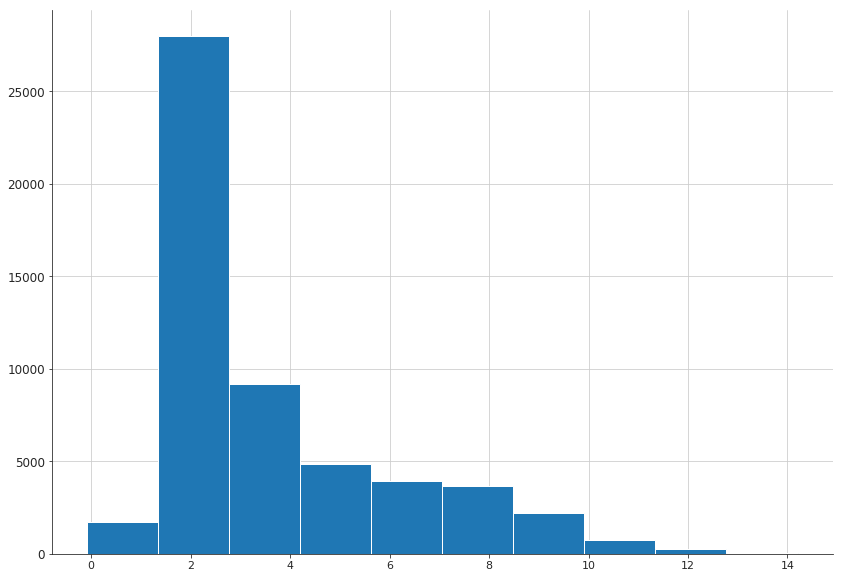

In [12]:
pivoted_control_samples['GSM2233519'].hist()
sns.despine()

In [13]:
for gsm_name, gsm in gse.gsms.items():
    print("Name: ", gsm_name)
    print("Metadata:",)
    for key, value in gsm.metadata.items():
        print(" - %s : %s" % (key, ", ".join(value)))
    print ("Table data:",)
    print (gsm.table.head())
    break

Name:  GSM2233519
Metadata:
 - title : Subject 495, region Amygdala
 - geo_accession : GSM2233519
 - status : Public on Aug 19 2016
 - submission_date : Jul 14 2016
 - last_update_date : Aug 20 2016
 - type : RNA
 - channel_count : 1
 - source_name_ch1 : Amygdala, 69 yr old male
 - organism_ch1 : Homo sapiens
 - taxid_ch1 : 9606
 - characteristics_ch1 : subject id: 495, age: 69, Sex: male, race: black, postmortem interval minutes: 255, ph: 6.3, clinical dementia rating: 0.5, braak neurofibrillary tangle score: 1, neuropathological category: Normal, average neuritic plaque density: 0, sum of cerad rating scores in multiple brain regions: 0, sum of neurofibrillary tangles density in multiple brain regions: 1, brain region: Amygdala, tissue: post-mortem brain
 - treatment_protocol_ch1 : N/A
 - growth_protocol_ch1 : N/A
 - molecule_ch1 : total RNA
 - extract_protocol_ch1 : Total RNA was isolated from 50 mg tissue aliquots from brain tissue samples, amplified to cRNA, and biotin-labeled for